In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# loading data
life_data_path = "life_data.csv"
clean_life_df = pd.read_csv(life_data_path).dropna() 
oecd_country_df = clean_life_df.groupby('LOCATION').mean()

Text(0.5, 0, 'OECD Countries')

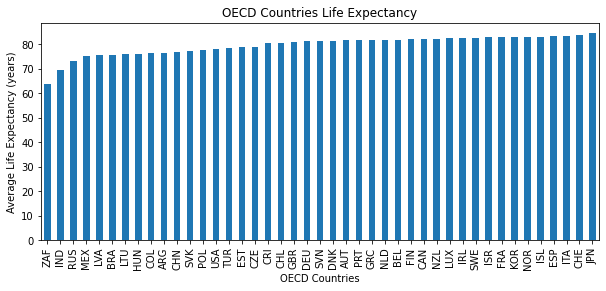

In [3]:
# create a Life Expectancy bar chart(chart 3)
oecd_country_df["LIFE EXPECTANCY"].sort_values().plot(kind="bar", figsize=(10,4))
plt.title("OECD Countries Life Expectancy")
plt.ylabel("Average Life Expectancy (years)")
plt.xlabel("OECD Countries")

In [4]:
#IQR 
def iqr_data (factor):
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = factor.quantile([0.25,0.5,0.75])
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]}")


Text(0, 0.5, 'Average Life Expectancy (years)')

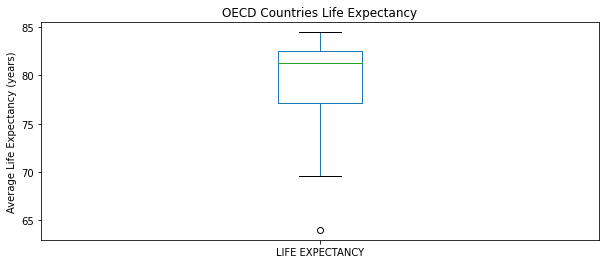

In [5]:
oecd_country_df["LIFE EXPECTANCY"].plot(kind="box", figsize=(10,4))
plt.title("OECD Countries Life Expectancy")
plt.ylabel("Average Life Expectancy (years)")
#plt.xlabel("OECD Countries")

In [6]:
#IQR for Life Expectancy
iqr_data (oecd_country_df["LIFE EXPECTANCY"])

The lower quartile is: 77.1
The upper quartile is: 82.51666666666667
The interquartile range is: 5.416666666666671
The the median is: 81.23333333333333


In [7]:
#Ptest
def lifeexpectancy81(factor):
    below81 = oecd_country_df.loc[(oecd_country_df["LIFE EXPECTANCY"]<=81),factor]
    over81 = oecd_country_df.loc[(oecd_country_df["LIFE EXPECTANCY"]>81),factor]
    mean_below81 = below81.mean()
    mean_over81 = over81.mean()
    print(f"Mean of {factor} for countries with life expectancy below 81: {mean_below81}")
    print(f"Mean of {factor} for countries with life expectancy over 81: {mean_over81}")
    t_test=st.ttest_ind(below81,over81, equal_var=False)
    print(t_test)


In [8]:
#Correlation
def life_expectancy_correlation(factor):
    x = oecd_country_df[factor]
    y = oecd_country_df["LIFE EXPECTANCY"]
    corr, p = st.stats.pearsonr(x, y)
    print(f"The correlation between {factor} and the life expectancy is {corr}.")
    return (corr)

Text(0.5, 0, 'OECD Countries')

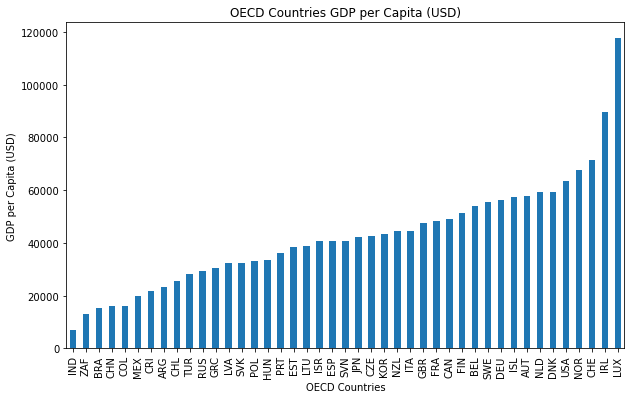

In [9]:
# create a map chart with gdp (chart 3)
oecd_country_df["GDP"].sort_values().plot(kind="bar", figsize=(10,6))
plt.title("OECD Countries GDP per Capita (USD)")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("OECD Countries")

Text(0, 0.5, 'GDP per Capita (USD)')

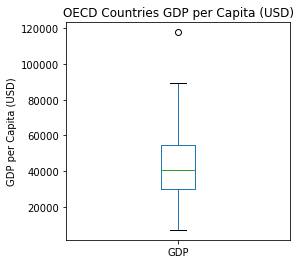

In [10]:
oecd_country_df["GDP"].plot(kind="box", figsize=(4,4))
plt.title("OECD Countries GDP per Capita (USD)")
plt.ylabel("GDP per Capita (USD)")
#plt.xlabel("OECD Countries")

In [11]:
#IQR for GDP per Capita
iqr_data (oecd_country_df["GDP"])

The lower quartile is: 29890.427142500004
The upper quartile is: 54759.71845683333
The interquartile range is: 24869.291314333328
The the median is: 40648.208082000005


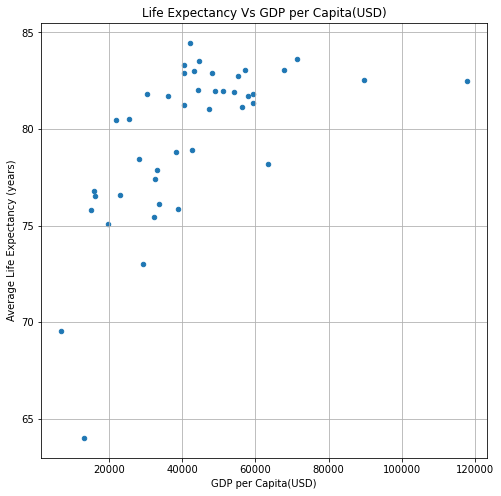

In [12]:
# make a scatter plot of gdp and le (chart 4)
oecd_country_df.plot(kind="scatter", x='GDP', y='LIFE EXPECTANCY', grid=True, figsize=(8,8))
plt.title("Life Expectancy Vs GDP per Capita(USD)")
plt.ylabel("Average Life Expectancy (years)")
plt.xlabel("GDP per Capita(USD)")
plt.show()

In [13]:
lifeexpectancy81("GDP")

Mean of GDP for countries with life expectancy below 81: 27922.21303260527
Mean of GDP for countries with life expectancy over 81: 54377.42584991667
Ttest_indResult(statistic=-5.49767715637582, pvalue=2.3139374963364098e-06)


In [14]:
life_expectancy_correlation("GDP")

The correlation between GDP and the life expectancy is 0.6150729388051909.


0.6150729388051909

Text(0, 0.5, 'Health Spending per Capita (USD)')

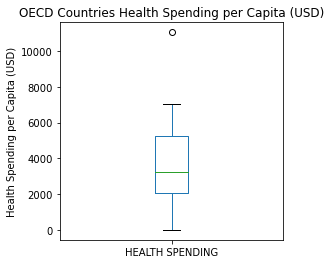

In [15]:
oecd_country_df["HEALTH SPENDING"].plot(kind="box", figsize=(4,4))
plt.title("OECD Countries Health Spending per Capita (USD)")
plt.ylabel("Health Spending per Capita (USD)")

In [16]:
iqr_data (oecd_country_df["HEALTH SPENDING"])

The lower quartile is: 2060.7546666666667
The upper quartile is: 5233.8025
The interquartile range is: 3173.047833333333
The the median is: 3247.049333333334


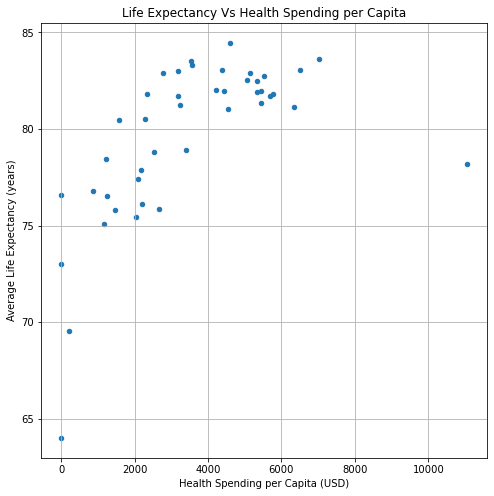

In [17]:
# make a scatter plot of healthcare expenditure and le (chart 5)
oecd_country_df.plot(kind="scatter", x='HEALTH SPENDING', y='LIFE EXPECTANCY', grid=True, figsize=(8,8), title="LIFE EXPECTANCY Vs. HEALTH SPENDING per Capita (USD)")
plt.title("Life Expectancy Vs Health Spending per Capita")
plt.ylabel("Average Life Expectancy (years)")
plt.xlabel("Health Spending per Capita (USD)")
plt.show()

In [18]:
lifeexpectancy81("HEALTH SPENDING")

Mean of HEALTH SPENDING for countries with life expectancy below 81: 2007.0453771929824
Mean of HEALTH SPENDING for countries with life expectancy over 81: 4690.970326388889
Ttest_indResult(statistic=-4.426987638050461, pvalue=0.00015755976301420576)


In [19]:
life_expectancy_correlation("HEALTH SPENDING")

The correlation between HEALTH SPENDING and the life expectancy is 0.6193802064853304.


0.6193802064853304

Text(0, 0.5, ' Average Annual Alcohol Consumption per Capita (litters)')

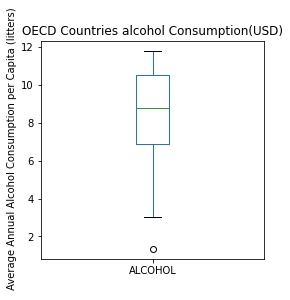

In [20]:
oecd_country_df["ALCOHOL"].plot(kind="box", figsize=(4,4))
plt.title("OECD Countries alcohol Consumption(USD)")
plt.ylabel(" Average Annual Alcohol Consumption per Capita (litters)")

In [21]:
iqr_data (oecd_country_df["ALCOHOL"])

The lower quartile is: 6.85
The upper quartile is: 10.516666666666666
The interquartile range is: 3.666666666666666
The the median is: 8.766666666666667


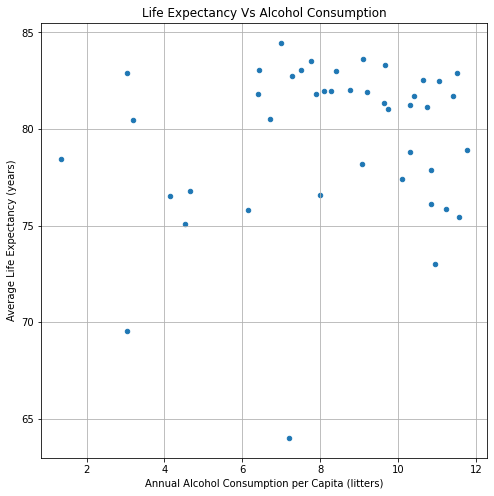

In [22]:
# correation of drinking alcohol with Le through scatter plot (chart 6)
oecd_country_df.plot(kind="scatter", y='LIFE EXPECTANCY', x='ALCOHOL', grid=True, figsize=(8,8))
plt.title("Life Expectancy Vs Alcohol Consumption")
plt.ylabel("Average Life Expectancy (years)")
plt.xlabel("Annual Alcohol Consumption per Capita (litters)")
plt.show()

In [23]:
lifeexpectancy81("ALCOHOL")

Mean of ALCOHOL for countries with life expectancy below 81: 7.665789473684209
Mean of ALCOHOL for countries with life expectancy over 81: 8.758333333333333
Ttest_indResult(statistic=-1.2503143560575949, pvalue=0.22180102102107158)


In [24]:
life_expectancy_correlation("ALCOHOL")

The correlation between ALCOHOL and the life expectancy is 0.1548118372419131.


0.1548118372419131

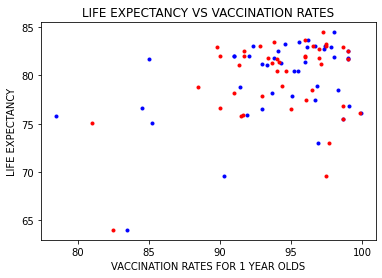

In [25]:
#affect of immunization(2) w le (chart 7
le = oecd_country_df['LIFE EXPECTANCY']
plt.title("LIFE EXPECTANCY VS VACCINATION RATES")
plt.ylabel("LIFE EXPECTANCY")
plt.xlabel("VACCINATION RATES FOR 1 YEAR OLDS")
plt.scatter(y=le, x=oecd_country_df['VACCINATION DTP'], color="blue", marker="." )
plt.scatter(y=le, x=oecd_country_df['VACCINATION MEASLES'], color="red", marker="." )
plt.show()

In [26]:
life_expectancy_correlation("VACCINATION DTP")

The correlation between VACCINATION DTP and the life expectancy is 0.4215927469184549.


0.4215927469184549

In [27]:
life_expectancy_correlation("VACCINATION MEASLES")

The correlation between VACCINATION MEASLES and the life expectancy is 0.34152186579128924.


0.34152186579128924

Text(0, 0.5, ' Average Country Population')

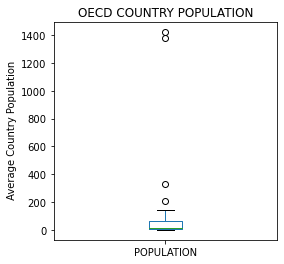

In [28]:
oecd_country_df["POPULATION"].plot(kind="box", figsize=(4,4))
plt.title("OECD COUNTRY POPULATION")
plt.ylabel(" Average Country Population")

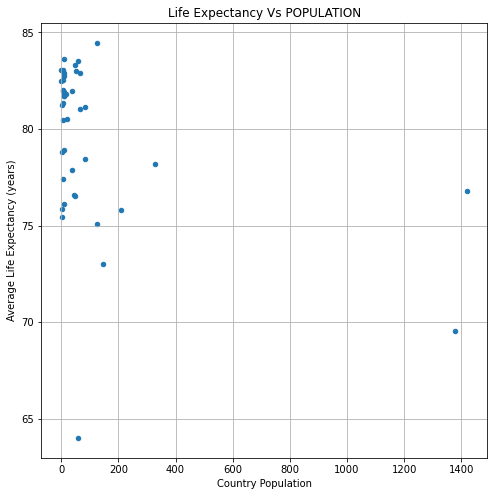

In [29]:
# correation of drinking alcohol with Le through scatter plot (chart 6)
oecd_country_df.plot(kind="scatter", y='LIFE EXPECTANCY', x='POPULATION', grid=True, figsize=(8,8))
plt.title("Life Expectancy Vs POPULATION")
plt.ylabel("Average Life Expectancy (years)")
plt.xlabel("Country Population")
plt.show()

In [30]:
lifeexpectancy81("POPULATION")

Mean of POPULATION for countries with life expectancy below 81: 207.17493099686598
Mean of POPULATION for countries with life expectancy over 81: 27.312308805555556
Ttest_indResult(statistic=1.8269935450736512, pvalue=0.08417594211506635)


The correlation between GDP and the life expectancy is 0.6150729388051909.
The correlation between HEALTH SPENDING and the life expectancy is 0.6193802064853304.
The correlation between ALCOHOL and the life expectancy is 0.1548118372419131.
The correlation between VACCINATION DTP and the life expectancy is 0.4215927469184549.
The correlation between VACCINATION MEASLES and the life expectancy is 0.34152186579128924.


Text(0.5, 0, 'Indicators')

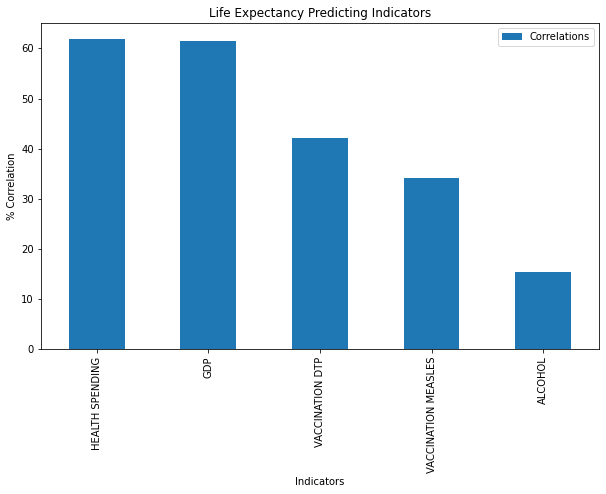

In [31]:
indicators=["GDP","HEALTH SPENDING", "ALCOHOL","VACCINATION DTP","VACCINATION MEASLES"]
correlations ={}
for indicator in indicators:
    correlations[indicator]=life_expectancy_correlation(indicator)
correlations_df= pd.DataFrame.from_dict(correlations,orient='index',columns=["Correlations"])
correlations_df['Correlations'] = correlations_df['Correlations']*100
correlations_df.sort_values("Correlations", ascending = False) 

correlations_df.sort_values("Correlations", ascending = False).plot(kind="bar", figsize=(10,6))
plt.title("Life Expectancy Predicting Indicators")
plt.ylabel("% Correlation")
plt.xlabel("Indicators")

In [36]:
# reginald
def quick_stats(factor,df):
    return f"Stats- Correlation: 62%; Max: {df[factor].max()}; Min: {df[factor].min()}; Median: {df[factor].median()}; Mean: {df[factor].mean()}"

In [37]:

strstr = []
for i in indicators:
    strstr.append([i,quick_stats(i,oecd_country_df)])
strstr

[['GDP',
  'Stats- Correlation: 62%; Max: 117793.768841; Min: 6997.7422719999995; Median: 40648.208082000005; Mean: 42687.9132097093'],
 ['HEALTH SPENDING',
  'Stats- Correlation: 62%; Max: 11055.360666666666; Min: 0.0; Median: 3247.049333333334; Mean: 3505.0500000000006'],
 ['ALCOHOL',
  'Stats- Correlation: 62%; Max: 11.766666666666667; Min: 1.35; Median: 8.766666666666667; Mean: 8.275581395348837'],
 ['VACCINATION DTP',
  'Stats- Correlation: 62%; Max: 99.90000000000002; Min: 78.5; Median: 95.23333333333333; Mean: 94.07325581395348'],
 ['VACCINATION MEASLES',
  'Stats- Correlation: 62%; Max: 99.86666666666667; Min: 81.0; Median: 94.63333333333333; Mean: 94.26124031007753']]